# DNN to predict the compressive strength just using NDT

## Importing necessary librariesm

In [1]:
import numpy as np
import tensorflow as tf
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline

### Charging the train and test datasets

In [2]:
# let's create a temporary variable npz, where we will store each of the two datasets
npz = np.load('Data_train.npz')
# we extract the inputs using the keyword under which we saved them # to ensure that they are all floats, let's also take care of that
train_inputs = npz['inputs'].astype(np.float32)
train_targets = npz['targets'].astype(np.float32)

# we load the test data in the temporary variable
npz = np.load('Data_test.npz')
# we create 2 variables that will contain the test inputs and the test targets
test_inputs, test_targets = npz['inputs'].astype(np.float32), npz['targets'].astype(np.float32)

In [3]:
# Set the input and output sizes
input_size = 3
output_size = 1
# Use same hidden layer size for hidden layers. Not a necessity.
hidden_layer_size = 100
    
# define how the model will look like
model = tf.keras.Sequential()
    # tf.keras.layers.Dense is basically implementing: output = activation(dot(input, weight) + bias)
    # it takes several arguments, but the most important ones for us are the hidden_layer_size and the activation function
model.add(tf.keras.layers.Dense(hidden_layer_size, activation='relu', input_shape=(input_size,))), # 1st hidden layer
model.add(tf.keras.layers.Dense(hidden_layer_size, activation='relu')), # 2th hidden layer
model.add(tf.keras.layers.Dense(hidden_layer_size, activation='relu')), # 1st hidden layer
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(hidden_layer_size, activation='sigmoid')), # 3th hidden layer
model.add(tf.keras.layers.Dense(1)) # output layer

# Choose the optimizer and the loss function

# we define the optimizer we'd like to use, 
# the loss function, 
# and the metrics we are interested in obtaining at each iteration
my_optimizer= tf.keras.optimizers.Adam(lr=0.0001)
model.compile(optimizer=my_optimizer, loss='mse', metrics=['mae','mse'])

# Training
# That's where we train the model we have built.

# set the batch size
batch_size = 2

# set a maximum number of training epochs
max_epochs = 150

# fit the model
modelo=model.fit(train_inputs, # train inputs
          train_targets, # train targets
          batch_size=batch_size, # batch size
          epochs=max_epochs, # epochs that we will train for (assuming early stopping doesn't kick in)
          validation_data=(test_inputs, test_targets), # validation data
          verbose =1 # making sure we get enough information about the training process
          )  

s/step - loss: 0.0879 - mae: 0.1996 - mse: 0.0879 - val_loss: 0.0492 - val_mae: 0.1756 - val_mse: 0.0492
Epoch 30/150
67/67 [==============================] - 0s 2ms/step - loss: 0.0930 - mae: 0.2205 - mse: 0.0930 - val_loss: 0.0443 - val_mae: 0.1604 - val_mse: 0.0443
Epoch 31/150
67/67 [==============================] - 0s 2ms/step - loss: 0.0943 - mae: 0.2111 - mse: 0.0943 - val_loss: 0.0465 - val_mae: 0.1710 - val_mse: 0.0465
Epoch 32/150
67/67 [==============================] - 0s 2ms/step - loss: 0.0947 - mae: 0.2180 - mse: 0.0947 - val_loss: 0.0423 - val_mae: 0.1566 - val_mse: 0.0423
Epoch 33/150
67/67 [==============================] - 0s 2ms/step - loss: 0.0923 - mae: 0.2136 - mse: 0.0923 - val_loss: 0.0466 - val_mae: 0.1719 - val_mse: 0.0466
Epoch 34/150
67/67 [==============================] - 0s 3ms/step - loss: 0.0915 - mae: 0.2181 - mse: 0.0915 - val_loss: 0.0433 - val_mae: 0.1573 - val_mse: 0.0433
Epoch 35/150
67/67 [==============================] - 0s 3ms/step - loss: 0

In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 100)               400       
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 101       
Total params: 30,801
Trainable params: 30,801
Non-trainable params: 0
____________________________________________________

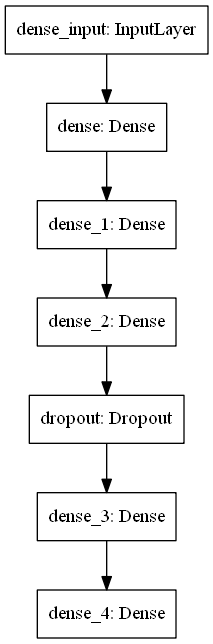

In [5]:
from tensorflow.keras.utils import plot_model
plot_model(model, to_file='multilayer_perceptron_graph.png')

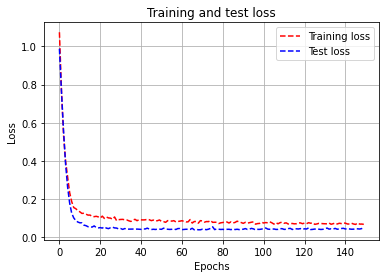

In [6]:
loss= modelo.history['loss']
val_loss = modelo.history['val_loss']
epochs = range(len(loss))
plt.plot(epochs, loss, 'r--', label='Training loss')
plt.plot(epochs, val_loss, 'b--', label='Test loss')
plt.title('Training and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.savefig("training_test.png",dpi=600)

## Test the model 
The test is the absolute final instance. You should not test before you are completely done with adjusting your model.
If you adjust your model after testing, you will start overfitting the test dataset, which will defeat its purpose.m

In [7]:
test_loss= model.evaluate(test_inputs, test_targets)

2/2 [==============================] - 0s 2ms/step - loss: 0.0523 - mae: 0.1695 - mse: 0.0523


In [8]:
# Let's go to estimate the accuracy in both datasets
a=model.predict(train_inputs)
b=model.predict(test_inputs)

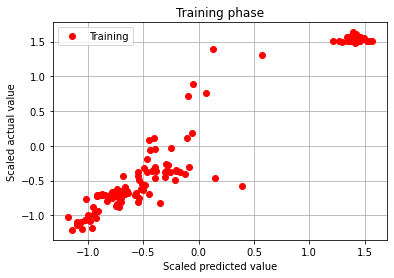

In [9]:
plt.plot(a, train_targets, 'ro', label='Training')
plt.title('Training phase')
plt.xlabel('Scaled predicted value')
plt.ylabel('Scaled actual value')
plt.legend()
plt.grid()
#plt.savefig("training.png",dpi=600)

In [10]:
r2_score(a,train_targets)

0.9166165959738157

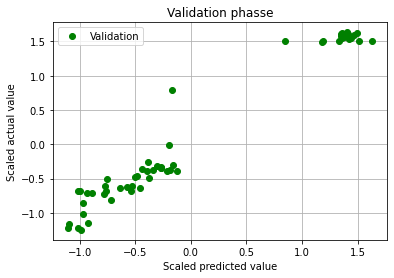

In [11]:
plt.plot(b, test_targets, 'go', label='Validation')
plt.title('Validation phasse')
plt.xlabel('Scaled predicted value')
plt.ylabel('Scaled actual value')
plt.legend()
plt.grid()
plt.savefig("Validation.png",dpi=600)

In [12]:
r2_score(b,test_targets)


0.9434715547376157

In [13]:
# save model
model.save('final_model.h5')